In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist 

In [2]:
#a. Loading and preprocessing the image data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)


(60000, 28, 28)


In [5]:
x_train[0].min(),x_train[0].max()

(0, 255)

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

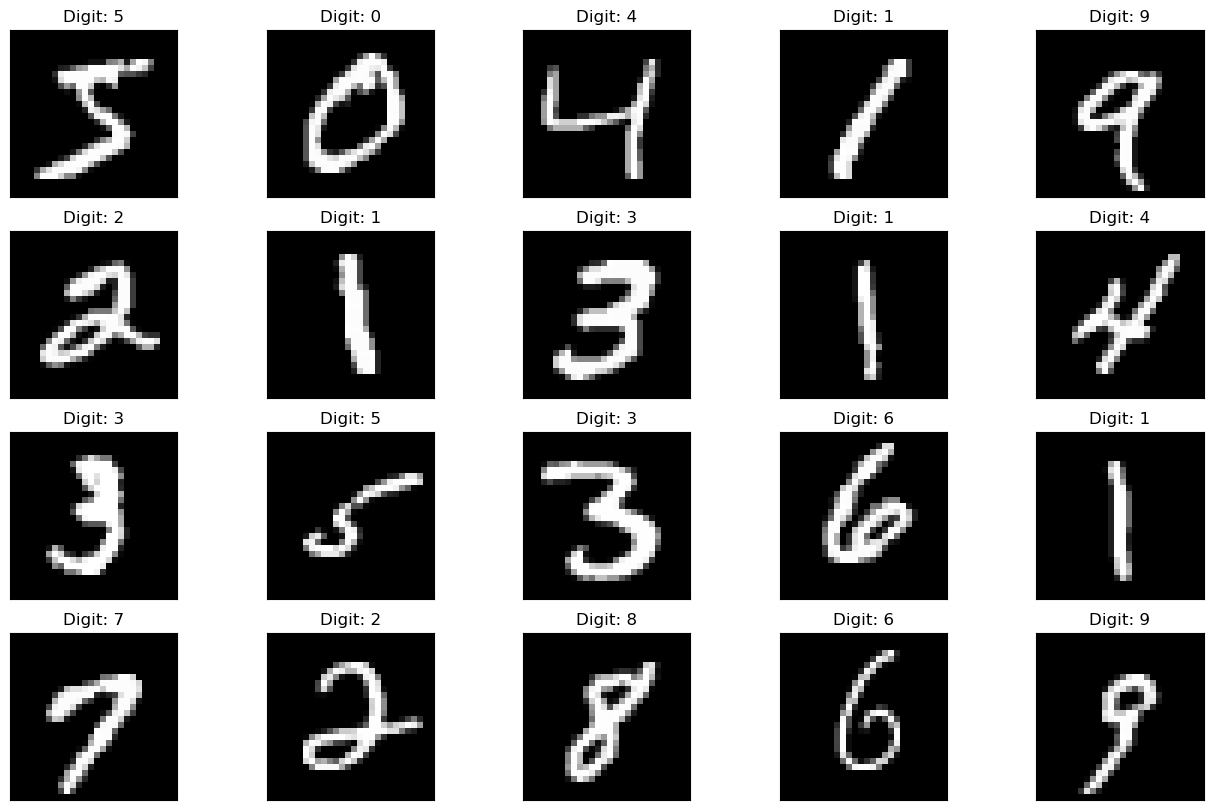

In [7]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5,i+1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(x_train[i],y_train[i], plt, i)
plt.show()

In [8]:
x_train=x_train.reshape((x_train.shape + (1,)))
x_test=x_test.reshape((x_test.shape + (1,)))

In [9]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
#b. Defining the model’s architecture
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation="relu"),
Dense(10, activation="softmax")
])


In [11]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [12]:
#c. training the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


1875/1875 [==============================] - 21s 11ms/step - loss: 0.2422 - accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0790 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0483 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0255 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0195 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0140 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0097 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 20s 1

In [14]:
#d. Estimating the model’s performance
predictions = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 4ms/step


0.9875

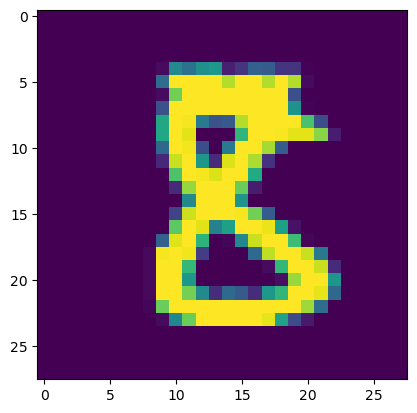

313/313 [==============================] - 1s 5ms/step
Handwritten number in the image is=8


In [17]:
import random
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print("Handwritten number in the image is=%d" %np.argmax(predicted_value[n]))

In [19]:
x,y=model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', x)
print('Test accuracy:', y)

Test loss: 0.04560748487710953
Test accuracy: 0.987500011920929
